In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def dispersion_2d(kx, ky, t, a):
    return -2 * t * (np.cos(kx * a) + np.cos(ky * a))

In [29]:
def real_retarded_Green_function(omega, kx, ky, t, delta_v,a=1):
    e_k= dispersion_2d(kx,ky,t,a)
    real_GF = (omega - e_k)/((omega - e_k)**2 + (delta_v)**2)
    return real_GF


In [30]:
def complex_retarded_Green_function(omega, kx, ky, t, delta_v,a=1):
    e_k= dispersion_2d(kx,ky,t,a)
    complex_GF = (-delta_v)/((omega - e_k)**2 + (delta_v)**2)
    return complex_GF

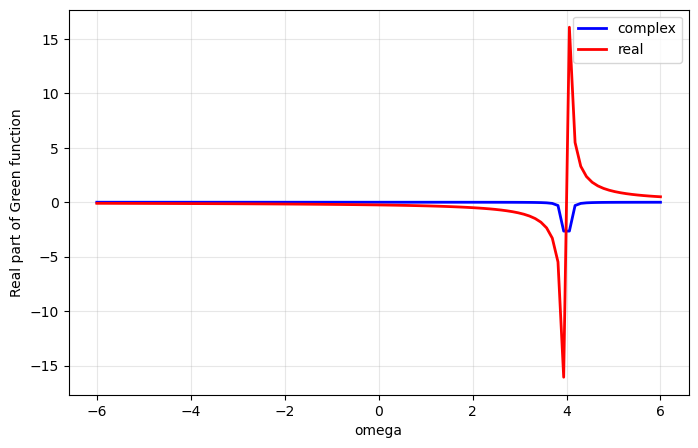

In [31]:
omega = np.linspace(-6, 6, 100) #range of omega
kx= np.pi #set value of kx and ky for plotting
ky= np.pi
t=1
delta=0.01

# Calculate y values
real_part = real_retarded_Green_function(omega,kx,ky,t,delta)
complex_part = complex_retarded_Green_function(omega,kx,ky,t,delta)

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(omega, complex_part, 'b-', linewidth=2, label='complex')
plt.plot(omega, real_part, 'r-', linewidth=2, label='real')
plt.title('')
plt.xlabel('omega')
plt.ylabel('Real part of Green function')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

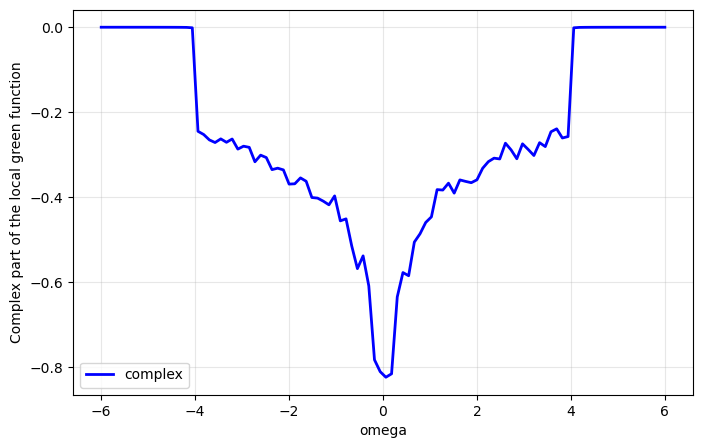

In [51]:

k_points=1000 #Number of k points needed for convergence
kx= np.linspace(-np.pi, np.pi, k_points) #set value of kx and ky for plotting
ky= np.linspace(-np.pi, np.pi, k_points) 
t=1
delta=0.001

real_part_local=np.zeros(100)
complex_part_local=np.zeros(100)



for x in kx:
    for y in ky:
        real_part_local= real_part_local + real_retarded_Green_function(omega,x,y,t,delta)

    
real_part_local= real_part_local/(k_points)**2


for x in kx:
    for y in ky:
        complex_part_local= complex_part_local + complex_retarded_Green_function(omega,x,y,t,delta)

complex_part_local=complex_part_local/(k_points)**2


plt.figure(figsize=(8, 5))
plt.plot(omega, complex_part_local, 'b-', linewidth=2, label='complex')
plt.title('')
plt.xlabel('omega')
plt.ylabel('Complex part of the local green function')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

